<a href="https://colab.research.google.com/github/mehmetsefaciftci/dsa210project/blob/main/notebook/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
from scipy.stats import pearsonr

countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Production'])
    corr_coef, p_value = pearsonr(df_c['Temperature'], df_c['Production'])
    print(f"\n{country} - Temperature vs Production")
    print(f"Pearson correlation coefficient: {corr_coef:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Statistically significant relationship found (reject H0).")
    else:
        print("No statistically significant relationship (fail to reject H0).")



Australia - Temperature vs Production
Pearson correlation coefficient: 0.1026
P-value: 0.5637
No statistically significant relationship (fail to reject H0).

Brazil - Temperature vs Production
Pearson correlation coefficient: 0.6997
P-value: 0.0000
Statistically significant relationship found (reject H0).

Germany - Temperature vs Production
Pearson correlation coefficient: 0.4606
P-value: 0.0061
Statistically significant relationship found (reject H0).

India - Temperature vs Production
Pearson correlation coefficient: 0.5931
P-value: 0.0002
Statistically significant relationship found (reject H0).

Nigeria - Temperature vs Production
Pearson correlation coefficient: 0.6274
P-value: 0.0001
Statistically significant relationship found (reject H0).

United States of America - Temperature vs Production
Pearson correlation coefficient: 0.6864
P-value: 0.0000
Statistically significant relationship found (reject H0).


In [21]:
from scipy.stats import pearsonr

countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Precipitation', 'Production'])
    corr_coef, p_value = pearsonr(df_c['Precipitation'], df_c['Production'])
    print(f"\n{country} - Precipitation vs Production")
    print(f"Pearson correlation coefficient: {corr_coef:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Statistically significant relationship found (reject H0).")
    else:
        print("No statistically significant relationship (fail to reject H0).")



Australia - Precipitation vs Production
Pearson correlation coefficient: 0.0948
P-value: 0.5937
No statistically significant relationship (fail to reject H0).

Brazil - Precipitation vs Production
Pearson correlation coefficient: -0.3960
P-value: 0.0204
Statistically significant relationship found (reject H0).

Germany - Precipitation vs Production
Pearson correlation coefficient: 0.1433
P-value: 0.4187
No statistically significant relationship (fail to reject H0).

India - Precipitation vs Production
Pearson correlation coefficient: 0.2475
P-value: 0.1581
No statistically significant relationship (fail to reject H0).

Nigeria - Precipitation vs Production
Pearson correlation coefficient: -0.2488
P-value: 0.1559
No statistically significant relationship (fail to reject H0).

United States of America - Precipitation vs Production
Pearson correlation coefficient: -0.0665
P-value: 0.7085
No statistically significant relationship (fail to reject H0).


In [22]:
from sklearn.linear_model import LinearRegression

countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Precipitation', 'Production'])

    if len(df_c) == 0:
        print(f"No sufficient data for {country}.")
        continue

    X = df_c[['Temperature', 'Precipitation']].values
    y = df_c['Production'].values

    model = LinearRegression()
    model.fit(X, y)

    print(f"\n{country} regression coefficients:")
    print(f"Temperature: {model.coef_[0]:.4f}")
    print(f"Precipitation: {model.coef_[1]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")



Australia regression coefficients:
Temperature: 119931.0570
Precipitation: 574.4265
Intercept: -1989354.9391

Brazil regression coefficients:
Temperature: 6995867.8599
Precipitation: 2864.4853
Intercept: -171625919.0583

Germany regression coefficients:
Temperature: 82928.8666
Precipitation: 203.1828
Intercept: 856729.0871

India regression coefficients:
Temperature: 5712719.3773
Precipitation: 7459.5838
Intercept: -137659391.0517

Nigeria regression coefficients:
Temperature: 1190070.6753
Precipitation: -244.7254
Intercept: -29575570.1354

United States of America regression coefficients:
Temperature: 1210839.8552
Precipitation: 372.1808
Intercept: -4764204.6197


R² score for Australia: 0.0659


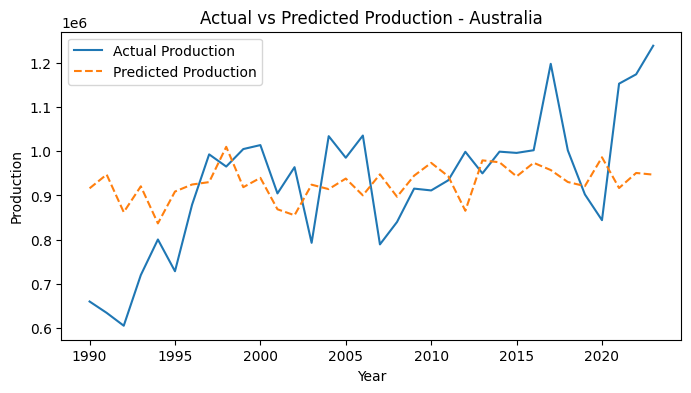

R² score for Brazil: 0.4954


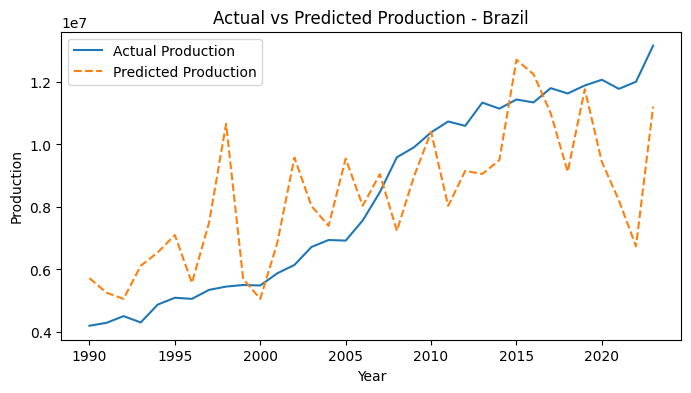

R² score for Germany: 0.2343


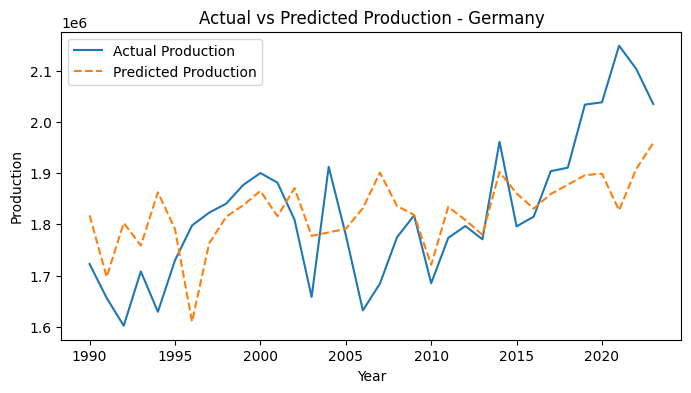

R² score for India: 0.4180


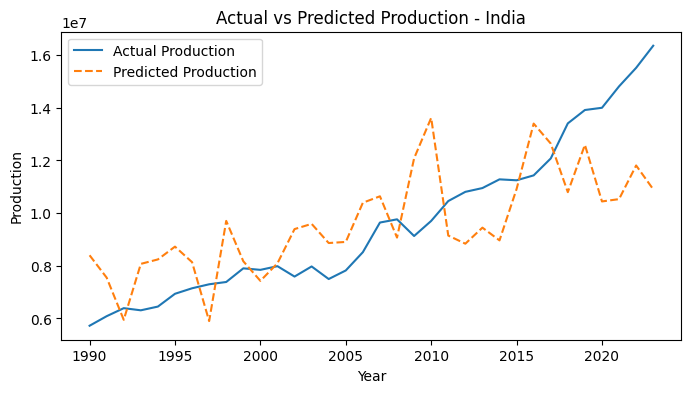

R² score for Nigeria: 0.3946


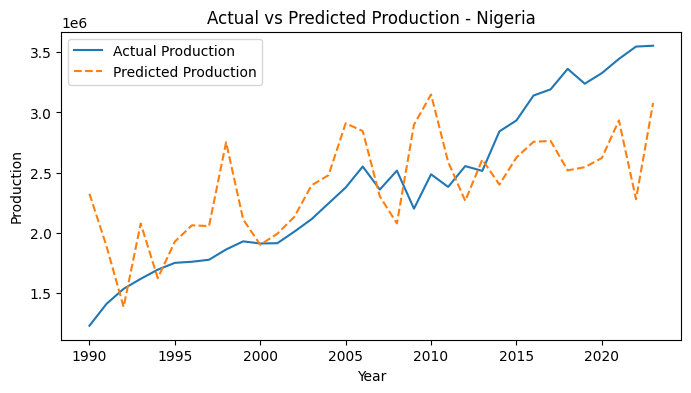

R² score for United States of America: 0.4715


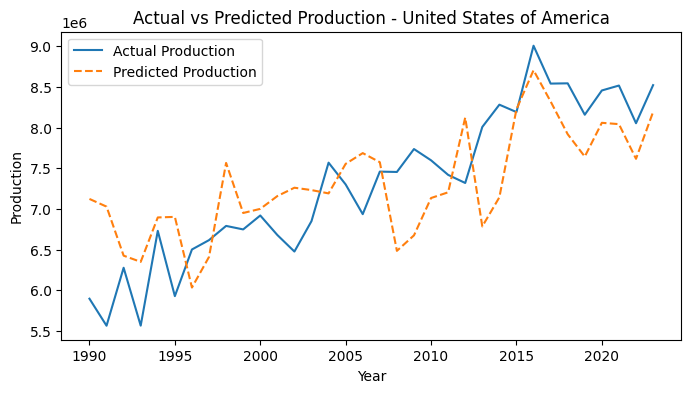

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Precipitation', 'Production'])

    if len(df_c) == 0:
        print(f"No sufficient data for {country}.")
        continue

    X = df_c[['Temperature', 'Precipitation']].values
    y = df_c['Production'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    print(f"R² score for {country}: {r2:.4f}")

    plt.figure(figsize=(8, 4))
    plt.plot(df_c['Year'], y, label='Actual Production')
    plt.plot(df_c['Year'], y_pred, label='Predicted Production', linestyle='--')
    plt.title(f'Actual vs Predicted Production - {country}')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.legend()
    plt.show()
